In [59]:
import numpy as np 
    
def nodes_degree(A):
    """
    Function returning the degree of a node.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    degree = np.sum(A, axis=0)
    
    return degree

In [ ]:
def path_length(A, i, j):
    """
    Function returning the minimum path length between thwo nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    i, j : Nodes indices.
    """
    
    Lij = - 1 # no connection 
    
    if A[i, j] > 0:
        Lij = 1 
    else:
        N = np.size(A[0, :])
        P = np.zeros([N, N]) + A
        n = 1
        running = True
        while running:
            P = np.matmul(P, A)
            n += 1
            running
            if P[i, j] > 0:
                Lij = n           
            if (n > N) or (Lij > 0):
                running = False   
    
    return Lij

In [61]:
def matrix_path_length(A):
    """
    Function returning a matrix L of minimum path length between nodes.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
    
    N = np.size(A[0, :])
    L = np.zeros([N, N]) - 1 
    
    for i in range(N):
        for j in range(i + 1, N):
            L[i, j] = path_length(A, i, j)
            L[j, i] = L[i, j]
    
    return L

In [62]:

def average_path_length(A):
    """
    Calculate the average path length for an adjacency matrix A.
    """
    L = matrix_path_length(A)
    L = L[np.where(L > 0)]  # delete length <= 0 

    if len(L) == 0:  
        return np.inf
    return np.mean(L)

In [63]:
def clustering_coefficient(A):
    """
    Function returning the clustering coefficient of a graph.
    
    Parameters
    ==========
    A : Adjacency matrix (assumed symmetric).
    """
            
    K = nodes_degree(A)
    N = np.size(K)

    C_n = np.sum(np.diagonal(np.linalg.matrix_power(A, 3)))
    C_d = np.sum(K * (K - 1))
    
    C = C_n / C_d
    
    return C

In [64]:


def erdos_renyi_rg(n, p):
    """
    Function generating an Erdős-Rényi random graph
    
    Parameters
    ==========
    n : Number of nodes.
    p : Probability that each possible edge is present.
    """
    
    A = np.zeros([n, n])    
    rn = np.random.rand(n, n)
    A[np.where(rn < p)] = 1
    
    for i in range(n):
        A[i, i] = 0
        
    # This below is for plotting in a circular arrangement.
    x = np.cos(np.arange(n) / n * 2 * np.pi)
    y = np.sin(np.arange(n) / n * 2 * np.pi) 
    
    return A, x, y


## Task 1

n = 100

In [ ]:
from matplotlib import pyplot as plt


n = 100  # nodes
ps = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # different p value
average_lengths = []
clustering_coeffs = []

length_std_errors = []
clustering_std_errors = []
gamma = 0.57722 # Euler-Mascheroni constant

for p in ps:
    lengths = []
    coeffs = []
    for _ in range(3):  
        A, _, _ = erdos_renyi_rg(n, p)  
        avg_len = average_path_length(A)  
        lengths.append(avg_len)  
        clus_coeff = clustering_coefficient(A)  
        coeffs.append(clus_coeff) 

    average_lengths.append(np.mean(lengths))
    length_std_errors.append(np.std(lengths))
    clustering_coeffs.append(np.mean(coeffs))
    clustering_std_errors.append(np.std(coeffs))
    
    print(f'p = {p}, saved.')



p = 0.02, saved.
p = 0.03, saved.
p = 0.04, saved.
p = 0.05, saved.
p = 0.06, saved.
p = 0.07, saved.
p = 0.08, saved.
p = 0.09, saved.
p = 0.1, saved.
p = 0.2, saved.
p = 0.4, saved.
p = 0.5, saved.
p = 0.6, saved.
p = 0.7, saved.
p = 0.8, saved.
p = 0.9, saved.
p = 1, saved.


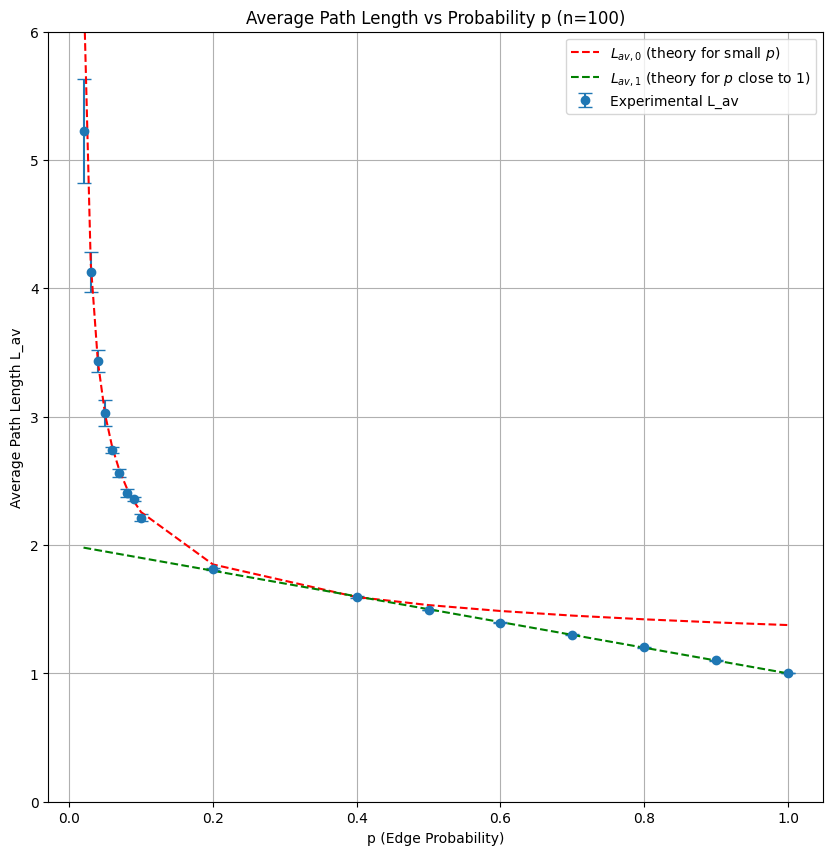

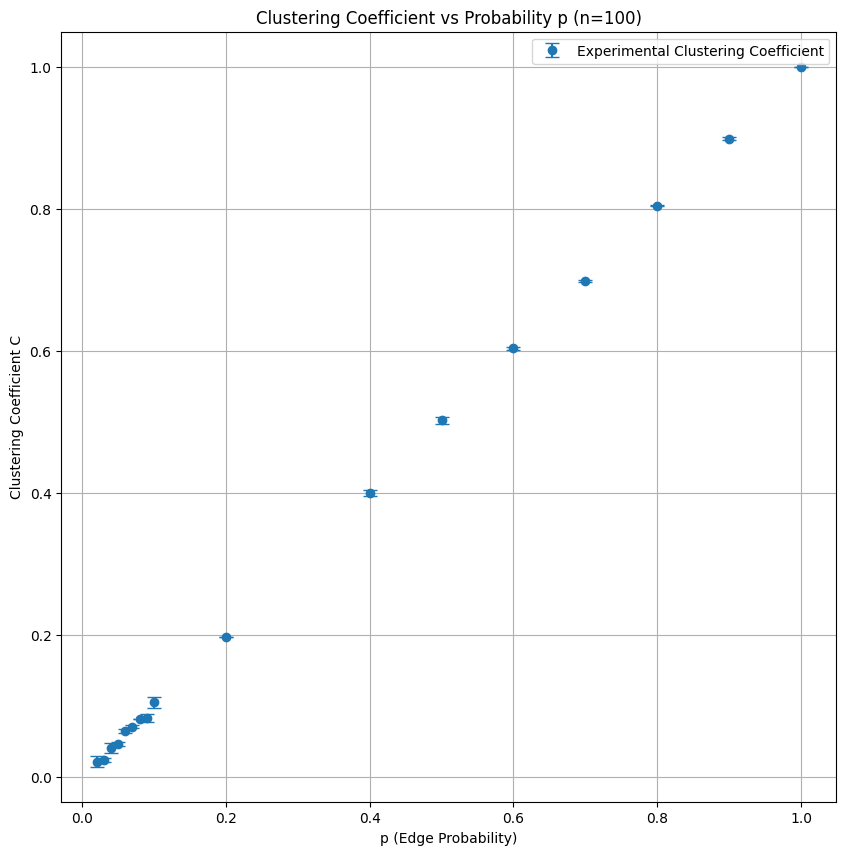

In [68]:
ps = np.array(ps) 
lav_0 = (np.log(n) - gamma) / np.log(ps * (n - 1)) + 0.5  
lav_1 = 2 - ps 

plt.figure(figsize=(10, 10))
plt.ylim(0, 6)
plt.errorbar(ps, average_lengths, yerr=length_std_errors, fmt='o', label='Experimental L_av', capsize=5)
plt.plot(ps, lav_0, 'r--', label=r'$L_{av,0}$ (theory for small $p$)')
plt.plot(ps, lav_1, 'g--', label=r'$L_{av,1}$ (theory for $p$ close to 1)')

plt.xlabel('p (Edge Probability)')
plt.ylabel('Average Path Length L_av')
plt.title('Average Path Length vs Probability p (n=100)')
plt.legend()
plt.grid()
plt.savefig('3.4_Task1_P1.png')
plt.show()

plt.figure(figsize=(10, 10))

plt.errorbar(ps, clustering_coeffs, yerr=clustering_std_errors, fmt='o', label='Experimental Clustering Coefficient', capsize=5)
plt.xlabel('p (Edge Probability)')
plt.ylabel('Clustering Coefficient C')
plt.title('Clustering Coefficient vs Probability p (n=100)')
plt.legend()
plt.grid()
plt.savefig('3.4_Task1_P2.png')
plt.show()

## Task 2

n = 200

In [69]:
from matplotlib import pyplot as plt


n = 200  # nodes
ps = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] # different p value
average_lengths = []
clustering_coeffs = []

length_std_errors = []
clustering_std_errors = []
gamma = 0.57722 # Euler-Mascheroni constant

for p in ps:
    lengths = []
    coeffs = []
    for _ in range(3):  
        A, _, _ = erdos_renyi_rg(n, p)  
        avg_len = average_path_length(A)  
        lengths.append(avg_len)  
        clus_coeff = clustering_coefficient(A)  
        coeffs.append(clus_coeff) 

    average_lengths.append(np.mean(lengths))
    length_std_errors.append(np.std(lengths))
    clustering_coeffs.append(np.mean(coeffs))
    clustering_std_errors.append(np.std(coeffs))
    
    print(f'p = {p}, saved.')



p = 0.02, saved.
p = 0.03, saved.
p = 0.04, saved.
p = 0.05, saved.
p = 0.06, saved.
p = 0.07, saved.
p = 0.08, saved.
p = 0.09, saved.
p = 0.1, saved.
p = 0.2, saved.
p = 0.4, saved.
p = 0.5, saved.
p = 0.6, saved.
p = 0.7, saved.
p = 0.8, saved.
p = 0.9, saved.
p = 1, saved.


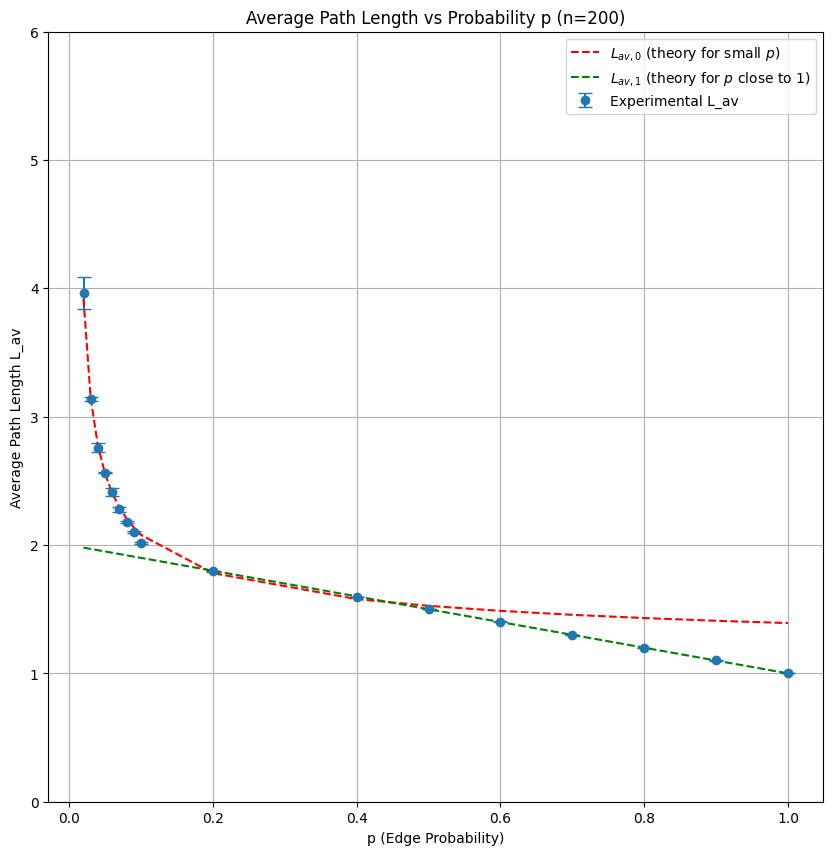

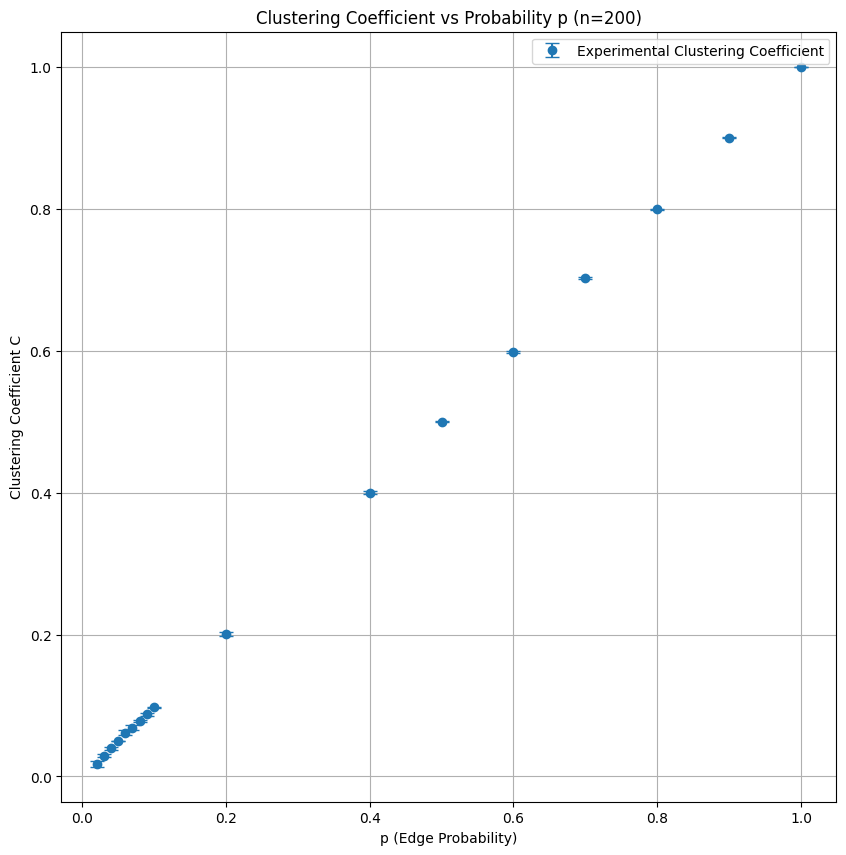

In [70]:
ps = np.array(ps) 
lav_0 = (np.log(n) - gamma) / np.log(ps * (n - 1)) + 0.5  
lav_1 = 2 - ps 

plt.figure(figsize=(10, 10))
plt.ylim(0, 6)
plt.errorbar(ps, average_lengths, yerr=length_std_errors, fmt='o', label='Experimental L_av', capsize=5)
plt.plot(ps, lav_0, 'r--', label=r'$L_{av,0}$ (theory for small $p$)')
plt.plot(ps, lav_1, 'g--', label=r'$L_{av,1}$ (theory for $p$ close to 1)')
plt.xlabel('p (Edge Probability)')
plt.ylabel('Average Path Length L_av')
plt.title('Average Path Length vs Probability p (n=200)')
plt.legend()
plt.grid()
plt.savefig('3.4_Task2_P3.png')
plt.show()

plt.figure(figsize=(10, 10))
plt.errorbar(ps, clustering_coeffs, yerr=clustering_std_errors, fmt='o', label='Experimental Clustering Coefficient', capsize=5)
plt.xlabel('p (Edge Probability)')
plt.ylabel('Clustering Coefficient C')
plt.title('Clustering Coefficient vs Probability p (n=200)')
plt.legend()
plt.grid()
plt.savefig('3.4_Task2_P4.png')
plt.show()